In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("homeprices_banglore.CSV")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
df.area.max()

3700

In [4]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
scaled_x = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df[['price']])
#expected 2D array
# scaled_y = sy.fit_transform(df.price.values.reshape(df.shape[0],1))

In [5]:
scaled_x,scaled_y

(array([[0.08827586, 0.25      ],
        [0.62068966, 0.75      ],
        [0.22068966, 0.5       ],
        [0.24862069, 0.5       ],
        [0.13793103, 0.25      ],
        [0.12758621, 0.25      ],
        [0.6662069 , 0.75      ],
        [0.86206897, 0.75      ],
        [0.17586207, 0.5       ],
        [1.        , 1.        ],
        [0.34482759, 0.5       ],
        [0.68448276, 0.75      ],
        [0.06896552, 0.25      ],
        [0.10344828, 0.25      ],
        [0.5       , 0.5       ],
        [0.12931034, 0.25      ],
        [0.13103448, 0.5       ],
        [0.25517241, 0.5       ],
        [0.67931034, 0.5       ],
        [0.        , 0.        ]]),
 array([[0.05237037],
        [0.65185185],
        [0.22222222],
        [0.31851852],
        [0.14074074],
        [0.04444444],
        [0.76296296],
        [0.91111111],
        [0.13333333],
        [1.        ],
        [0.37037037],
        [0.8       ],
        [0.04444444],
        [0.05925926],
        [0

In [6]:
def batch_gradient_descent(x,y_true,epochs,learning_rate = 0.01):
    cost_list = []
    epoch_list = []
    total_samples = x.shape[0]
    no_of_features = x.shape[1]
    #x.shape returns (nrow,ncol)
    
    w = np.ones(shape=(no_of_features)) 
    #initialize np array w with [1,1]
    bias = 0
    
    for i in range(epochs):
        y_predicted = np.dot(w,scaled_x.T) + bias # w1*area + w2*bedroom
          
        w_der = -(2/total_samples)*(x.T.dot(y_true-y_predicted))
        bias_der = -(2/total_samples)* np.sum(y_true-y_predicted)
        
        w = w - learning_rate*w_der
        bias = bias - learning_rate*bias_der
        
        cost = np.mean(np.square(y_predicted-y_true))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,bias,cost,cost_list,epoch_list

In [7]:
w,bias,cost,cost_list,epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0]),500)
w,bias,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

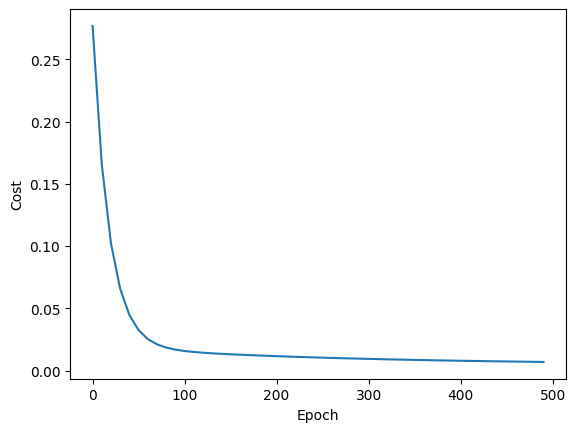

In [8]:
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list,cost_list)

In [54]:
sx.transform([[2600,4]])

C:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [10]:
def prediction_function(area,bedrooms,weights,bias):
    scaled_x = sx.transform([[area,bedrooms]])[0]
    
    scaled_y = weights[0]*scaled_x[0]+weights[1]*scaled_x[1]+bias
    #to get actual price instead of scaled one 0.6
    return sy.inverse_transform([[scaled_y]])[0][0]
    
prediction_function(1000,2,w,bias)

C:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

STOCHASTIC GD

In [47]:
def stochastic_gradient_descent(x,y_true,epochs,learning_rate = 0.01):
    cost_list = []
    epoch_list = []
    total_samples = x.shape[0]
    no_of_features = x.shape[1]
    #x.shape returns (nrow,ncol)
    
    w = np.ones(shape=(no_of_features)) 
    #initialize np array w with [1,1]
    bias = 0
    
    for i in range(epochs):
        import random
        random_index = random.randint(0,total_samples-1)
        sample_X = x[random_index]
        sample_Y = y_true[random_index]
        y_predicted = np.dot(w,sample_X.T) + bias # w1*area + w2*bedroom
          
        w_der = -(2/total_samples)*(sample_X.T.dot(sample_Y-y_predicted))
        bias_der = -(2/total_samples)* (sample_Y-y_predicted)
        
        w = w - learning_rate*w_der
        bias = bias - learning_rate*bias_der
        
        cost = np.square(y_predicted-sample_Y)
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,bias,cost,cost_list,epoch_list

In [48]:
w_sgd,bias_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0]),10000)
print('w_sgd=',w_sgd)
print('bias_sgd=',bias_sgd)
print('cost_sgd=',cost_sgd)
# # cost_list_sgd,epoch_list_sgd

w_sgd= [0.70811772 0.6734495 ]
bias_sgd= -0.2295324675607071
cost_sgd= 0.0002460778428231915


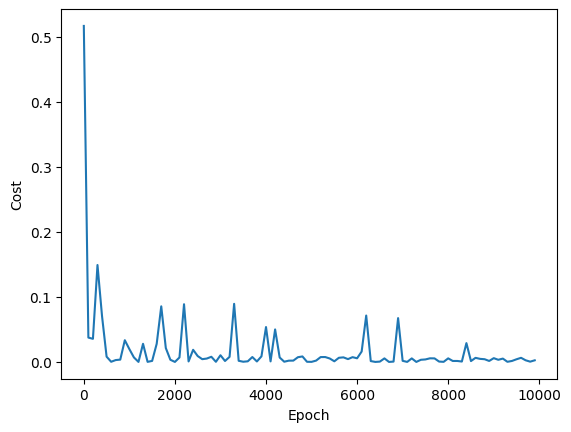

In [49]:
plt.gray()
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [50]:
prediction_function(1000,2,w,bias)

C:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [51]:
prediction_function(1000,2,w_sgd,bias_sgd)

C:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.334857622589517

Implement MINI-BATCH GD in Python and Plot cost vs epoch graph.
We use a batch of  samples in each iteration.
If we have 50 training samples, we take a batch of 10 samples; calculate cumulative error of those 10 
and then adjust WEIGHTS

In [68]:
def minibatch_gradient_descent(x,y_true,epochs,batch_size=5,learning_rate = 0.01):
    cost_list = []
    epoch_list = []
    total_samples = x.shape[0]
    no_of_features = x.shape[1]
    #x.shape returns (nrow,ncol)
    
    w = np.ones(shape=(no_of_features)) 
    #initialize np array w with [1,1]
    b = 0
    
    if batch_size > total_samples:
        batch_size = total_samples
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = x[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [69]:
w_mbgd,bias_mbgd,cost_mbgd,cost_list_mbgd,epoch_list_mbgd = minibatch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0]),500)
w_mbgd,bias_mbgd,cost_mbgd

(array([0.67123798, 0.53360921]), -0.14361966327273556, 0.0004075373313886588)

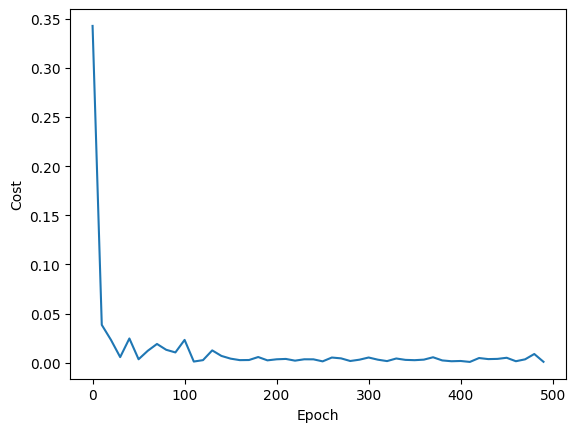

In [70]:
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list_mbgd,cost_list_mbgd)

In [78]:
prediction_function(1440,3,w_mbgd,bias_mbgd)

C:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


68.62822971356698

In [79]:
prediction_function(1440,3,w_sgd,bias_sgd)

C:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


67.5679826016767

In [85]:
df[['price','bedrooms']][df.area==1440]

,price,bedrooms
2,62.0,3


In [86]:
prediction_function(1440,3,w,bias)

C:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


67.5035355790645